<h2>OBSERVATIONAL ASTROPHYSICS – FALL 2024 Analysing real spectra (50 points)</h2>

In this exercise we will look at the spectra of three objects that we took as part of the class in a previous year: M57 - a planetary nebula, Jupiter as seen in reflected sunlight, and the star Vega.

All code elements that you need to change will be indicated with a #**************** section in the code

There are 6 problems.  

**Due on Dec. 11 at 11:59am**

In [1]:
import astropy.units as u
from astropy.table import unique, Table
import numpy as np
from matplotlib import pyplot as plt
import os
from specutils import Spectrum1D
from numpy.random import uniform
import matplotlib.transforms as transforms

In [2]:
'''
This subroutine will allow us to draw lines on our spectra.  

It takes as input a dictionary of lines and plots a vertical line and a label at each wavelength of the dictionary.

'''
def lineplot(linelist):
    transDA = transforms.blended_transform_factory(
    ax.transData, ax.transAxes) #  from the transforms tutorial

    for line in linelist:
        if((line[1]>lammin) & (line[1]<lammax)):
            plt.axvline(linewidth=0.5,color='r',x=line[1])
            plt.text(line[1], #wavelength from list
                     uniform(0.5,1), # wiggle the labels so they don't overlap
                     line[0], # string label
                     transform=transDA,
                     color='red',
                     family='serif')

### Measure characteristics of the spectrum

This spectrum was taken with the Breyo telescope.  It has been fully reduced and wavelength calibrated.  The flux is delivered in each pixel.

### Identify features in spectrum of M57

In this exercise you will identify various components of the spectrum of M57.  In doing this you can zoom in and out of the plot using the `ax.set_xlim` and `ax.set_ylim()` commands.  

### Problem 1 - identify lines (4 points)
Uncomment all the spectral features in the "linelist" variable that correspond to clear features in the spectrum.    *Note: Not all features have line designations in my list*

<>:16: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_802731/1311032298.py:16: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\lambda$",fontsize=20)


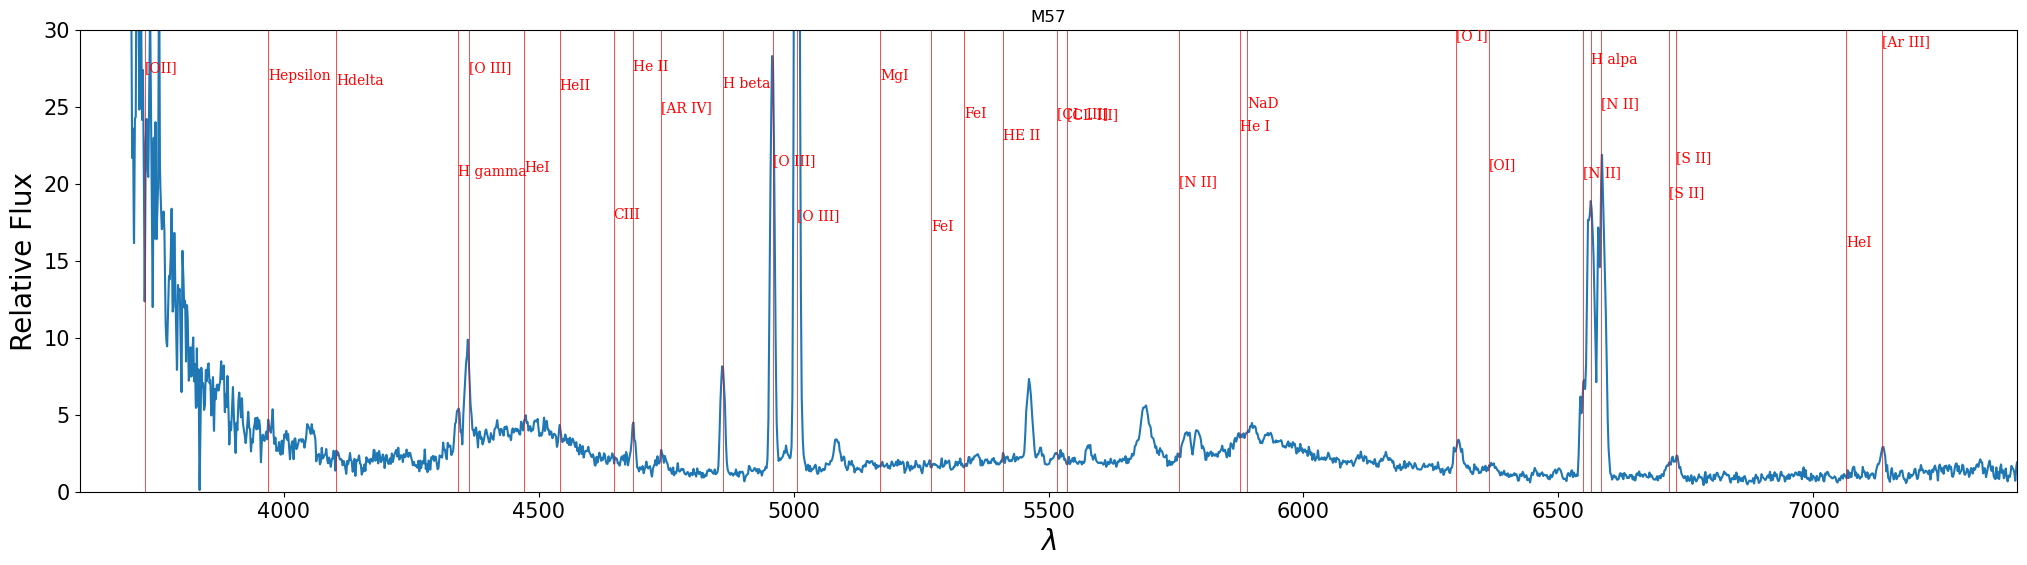

In [3]:
#read in the three spectra we took
m57_path = 'M57_Object_CROP.fit'
vega_path ='Vega_Object_CROP.fit'
jup_path = 'Jupiter_Object_CROP.fit'

specm57 = Spectrum1D.read(m57_path)
specjup = Spectrum1D.read(jup_path)
specvega = Spectrum1D.read(vega_path)

#plot the M57 spectrum
plt.figure(figsize = (25,6))
ax = plt.gca()
plt.plot(specm57.wavelength,specm57.flux,label="M57")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$\lambda$",fontsize=20)
plt.ylabel("Relative Flux",fontsize=20)
plt.title('M57')

#**************
#your code here
#you can change these to zoom in and out of certain parts of the spectra.  
#Make a copy of these and change your copy so as to remember what the 
#original values were
fluxmin = 0
fluxmax = 30
lammin = 3600
lammax = 7400
ax.set_ylim([fluxmin,fluxmax])
ax.set_xlim([lammin,lammax])

#***************************
#your code here
#Uncomment all of the lines that correspond to identifiable features in the spectra
linelist = [
     ('[AR IV]',4740),
     ('[OII]',3727),
     ('[O III]',4363),
     ('[O III]',4959),
     ('[O III]',5007),
     ('[O I]',6300),
     ('[OI]',6363),
     ('[N II]',6548),
     ('[N II]',6584),
     ('[S II]',6716),
     ('[S II]',6731),
     ('CIII',4647),
     ('MgI',5170),
     ('FeI', 5270),
     ('Hepsilon',3970),
     ('Hdelta',4103),
     ('H gamma',4341),
     ('H beta',4861),
     ('H alpa',6563),
     ('NaD', 5890),
     ('HeII',4541),
     ('He II',4686),
     ('HeI',4471),
     ('HE II',5411),
     ('[CL III]',5517),
     ('[CL III]',5537),
     ('[N II]',5755),
     ('He I',5875),
     ('HeI',7065),
     ('[Ar III]',7135),
     ('FeI',5335)
]
#draw lines on the spectrum
lineplot(linelist)

### Problem 2  - measure the spectral resolution of the spectrograph
Using the code block below, measure the wavelength resolution $\Delta \lambda$ and the spectral resolution $R$ for the M57 spectra.  Any derivation you do to solve the problem must be explained here.  

Assume that the intrinsic width of the spectral lines is significantly smaller than $\Delta\lambda$.  

We will try two different estimates, one using measurements by eye and one by fitting a model to the line.

There are parts a-d in this problem.

#### Problem 2a - compute the quantities using a by eye estimates (4 points)

<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_802731/510573627.py:9: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\lambda$",fontsize=20)  # Labeling the x-axis with wavelength, since that's what we're dealing with


Delta Lambda = 10.50
R = 462.43


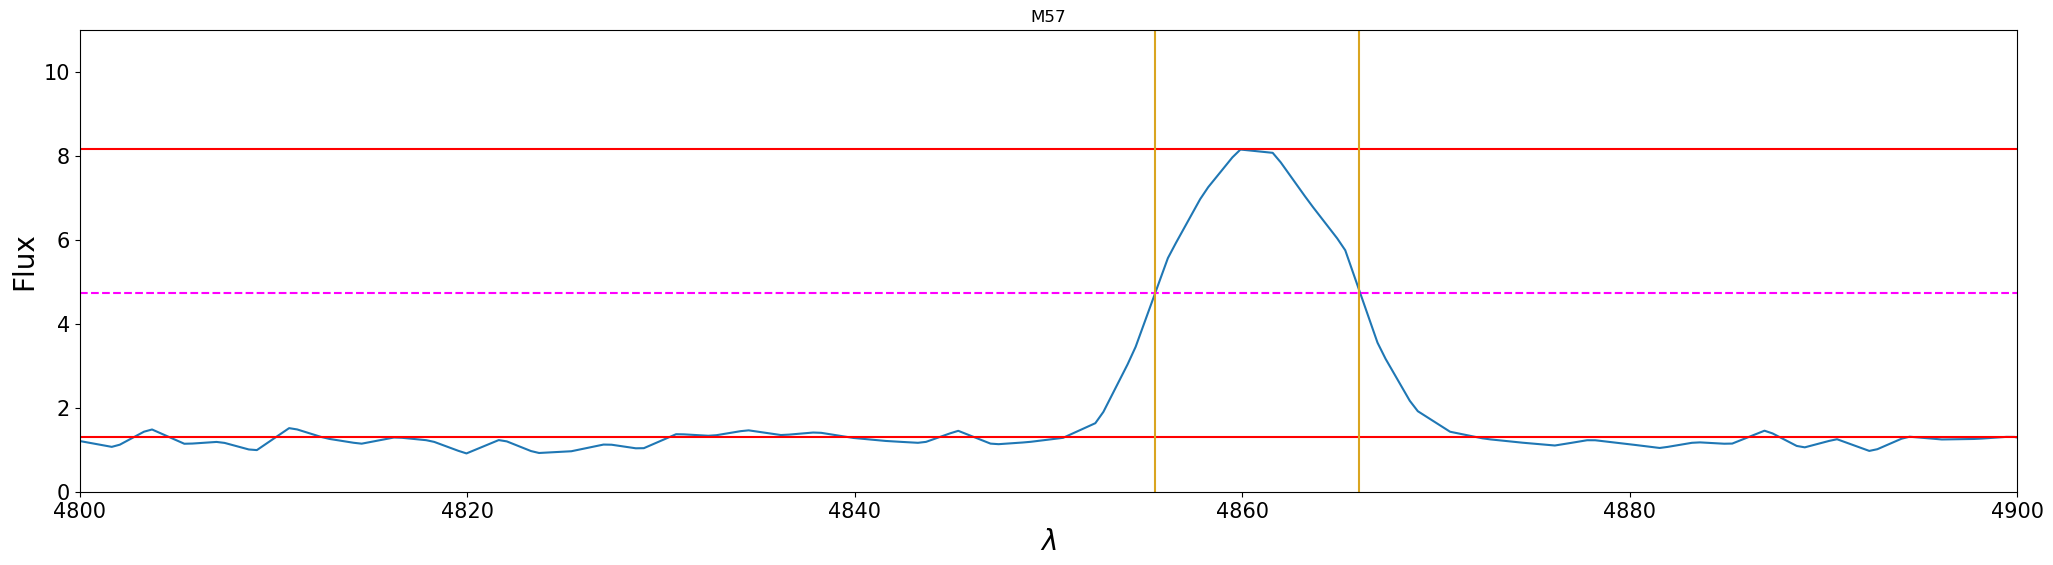

In [41]:
# First, I decided to zoom in on one emission line to focus on the interesting part of the spectrum.
# The idea is to pick a real and isolated emission line that we can properly analyze.
# Plotting the M57 spectrum so we can see it clearly
plt.figure(figsize = (25,6))  # I made the figure wide (25x6 inches) to have a nice and clear view of the spectrum
ax = plt.gca()
plt.plot(specm57.wavelength,specm57.flux,label="M57")  # Plotting the M57 spectrum (wavelength vs flux)
plt.xticks(fontsize=15)  # I chose a large font size for the x-axis to make it easy to read
plt.yticks(fontsize=15)  # Same for the y-axis, I wanted it clear and legible
plt.xlabel("$\lambda$",fontsize=20)  # Labeling the x-axis with wavelength, since that's what we're dealing with
plt.ylabel("Flux",fontsize=20)  # Labeling the y-axis with Flux, the main measurement in the plot
plt.title('M57')  # Giving the plot a title to remind us what we're looking at

# I want to zoom in on a specific region of the spectrum to focus on the emission line.
# I’m keeping the range limited to what seems to be the region around the emission line.
# **************
# Your code here.
#Everything 
fluxmin = 0  # I corrected the minimum flux value to 0 to start from the baseline (no negative flux values here)
fluxmax = 11  #  As in the correction picking 11 as the maximum flux so we capture the peak of the line comfortably
lammin = 4800  # 4800 is the lower limit because it captures the left part of the emission line I'm interested in
lammax = 4900  # And 4900 as the upper limit because the emission line seems to end around there
ax.set_ylim([fluxmin,fluxmax])  # Applying the flux range to zoom in on the emission line
ax.set_xlim([lammin,lammax])  # Setting the wavelength range to zoom in on the line as well

# Now, I want to estimate the continuum and the peak of the emission line, so I add horizontal lines.
# The continuum is basically the baseline level, and the peak represents the maximum flux.
contlevel = 1.3  # I estimated the continuum level here, based on the baseline of the spectrum
plt.axhline(contlevel, color='red')  

linepeak = 8.15  # The peak of the emission line seemed to be around 8.15 flux units
plt.axhline(linepeak, color='red')  

# The half-maximum is important for calculating the width of the emission line.
# This is the point where the flux drops to halfway between the continuum and the peak.
halfmax = (linepeak + contlevel)/2  # I just took the average of the peak and the continuum to get the half-max value as in the correction doc
plt.axhline(halfmax,color='magenta',linestyle='--') 

# Now, I want to find the wavelengths corresponding to the short and long wavelength sides of the FWHM.
# These are the points where the flux drops to the half-max value.
lowlam = 4855.5  # I picked 4855.5 as the lower wavelength, which is roughly where the flux starts dropping
highlam = 4866  # 4866 seemed to be the upper limit where the flux falls back down
plt.axvline(lowlam,color='goldenrod')  
plt.axvline(highlam,color='goldenrod') 

# Calculating the FWHM (Full Width at Half Maximum) by finding the difference between these two wavelengths
deltalam = highlam - lowlam  # The FWHM is the difference between the long and short wavelength values
print('Delta Lambda = %5.2f' % deltalam)  # Printing the FWHM, which tells us the width of the emission line

# Finally, calculating the spectral resolution, which tells us how well the instrument can distinguish wavelengths.
lamcent = (lowlam + highlam)/2  # I calculated the central wavelength by averaging the low and high values
specres = lowlam/deltalam  # The spectral resolution is the central wavelength divided by the FWHM
print('R = %6.2f' % specres)  # Printing the spectral resolution, which helps us understand the instrument’s resolving power


#### Problem 2b - compute the quantities by fitting a function (8 points)

First we need to fit a continuum and subtract it, as the fitting functions require a continuum subtracted spectrum.  The result of this should be a continuum with a level of zero.  Your continuum subtracted spectrum should have as flat of a continuum as possible, ignoring the regions that you exclude from the fitting (see below).

<>:62: SyntaxWarning: invalid escape sequence '\l'
<>:81: SyntaxWarning: invalid escape sequence '\l'
<>:62: SyntaxWarning: invalid escape sequence '\l'
<>:81: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_802731/4072546006.py:62: SyntaxWarning: invalid escape sequence '\l'
  ax1.set_xlabel("$\lambda$", fontsize=20)  # Labeling the x-axis with wavelength.
/tmp/ipykernel_802731/4072546006.py:81: SyntaxWarning: invalid escape sequence '\l'
  ax2.set_xlabel("$\lambda$", fontsize=20)  # Labeling the x-axis again for the subtracted spectrum.


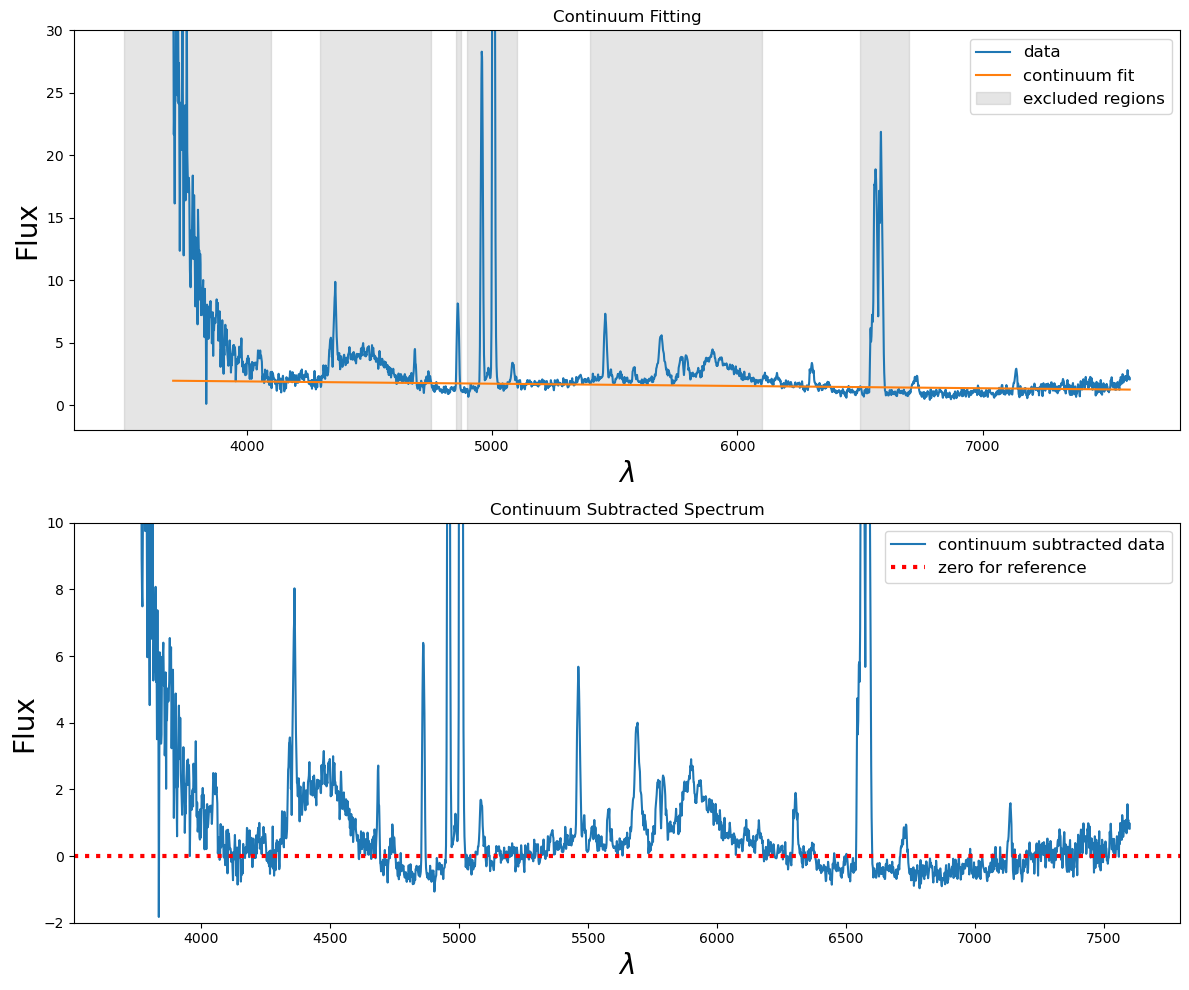

In [45]:
# Importing necessary modules for continuum fitting
from specutils.fitting.continuum import fit_generic_continuum
from specutils.spectra import Spectrum1D, SpectralRegion
import warnings
import astropy.units as u
from astropy.modeling import models, fitting

# You will need to define spectral regions to exclude. 
# The fitting algorithm fits a running median of the spectra, 
# which helps to get rid of weak emission lines. However, 
# you should try to define windows to remove other emission lines as well.
# We make these regions using the "SpectralRegion" function.
# Below, I give you two such regions as examples for demonstration.

# Excluding the very blue short wavelength region, as it is hard to fit with the function I use
# and because there are no emission lines of interest there. 
# These are the bounds of the regions we are excluding from fitting.
lamlow = [3500, 4300]  # Defining lower bounds of the regions (3500 and 4300 Å)
lamhigh = [4100, 4750]  # Defining upper bounds of the regions (4100 and 4750 Å)

# ************************
# You can extend this list with additional regions you'd like to exclude from fitting.
# I’m adding a few more regions where emission lines are either too strong or too weak to fit properly.
# Lower bounds of additional regions to exclude.
lamlow.extend([4855, 4900, 5400, 6500])  # Adding more lower bounds of regions to exclude (4855, 4900, 5400, 6500 Å)
# Upper bounds of additional regions to exclude.
lamhigh.extend([4875, 5100, 6100, 6700])  # Adding more upper bounds of regions to exclude (4875, 5100, 6100, 6700 Å)

# Creating the SpectralRegion object that contains all the excluded regions.
# The loop below is used to combine all these regions into a single exclusion region.
for ilam, lam in enumerate(lamlow):
    # For the first region, create the initial exclusion region.
    if ilam == 0:
        excl_region = SpectralRegion(lamlow[ilam] * u.Angstrom, lamhigh[ilam] * u.Angstrom)

    # For subsequent regions, append them to the existing exclusion region.
    excl_region += SpectralRegion(lamlow[ilam] * u.Angstrom, lamhigh[ilam] * u.Angstrom)

# *************
# Now we fit the continuum by using a Chebyshev polynomial, and we must play around with the degree and 
# median_window parameters to get a good fit. 
# We’ll ignore warnings because they might appear due to the fitting process.
# The 'fit_generic_continuum' function does the fitting based on the specified exclusion regions.
with warnings.catch_warnings():  # Ignore warnings to keep the output clean
    warnings.simplefilter('ignore')
    # Using the Chebyshev polynomial of degree 1 for the continuum fitting.
    # The 'exclude_regions' parameter ensures that the regions we defined are excluded from the fitting process.
    fitted_continuum = fit_generic_continuum(specm57, exclude_regions=excl_region, median_window=1,
                                             model=models.Chebyshev1D(degree=1))

# This gives us the fitted continuum, which we can now subtract from the original spectrum.
y_fit = fitted_continuum(specm57.wavelength)

# Plotting the spectrum and the fitted continuum.
# We create two subplots, one for the original spectrum with the continuum fit, and one for the continuum-subtracted spectrum.
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))  
# Plotting the original spectrum (data) and the fitted continuum.
ax1.plot(specm57.wavelength, specm57.flux, label='data')  
ax1.plot(specm57.wavelength, y_fit, label='continuum fit')  
ax1.set_title("Continuum Fitting")  # Giving the title to the first subplot.
ax1.set_ylim(-2, 30)  # Setting the y-axis limits to better visualize the spectrum and the fit.
ax1.set_xlabel("$\lambda$", fontsize=20)  # Labeling the x-axis with wavelength.
ax1.set_ylabel("Flux", fontsize=20)  # Labeling the y-axis with flux.

# To help you decide which regions to exclude, plot gray regions that are excluded.
# These regions are shaded gray in the plot to indicate which parts are excluded from the continuum fit.
for ilam, lam in enumerate(lamlow):
    # Filling the areas that we excluded with a transparent gray color.
    ax1.fill_betweenx([-100, 100], lamlow[ilam], x2=lamhigh[ilam], color='gray', alpha=0.2, label='excluded regions')

    # Only create the legend after the first iteration to avoid multiple legend entries for the same region.
    if ilam == 0:
        ax1.legend(fontsize=12)

# Now plotting the continuum-subtracted spectrum in the second subplot.
contsubspec = specm57.flux - y_fit  # Subtracting the continuum from the original spectrum.
ax2.plot(specm57.wavelength, contsubspec, label='continuum subtracted data')  
ax2.set_title("Continuum Subtracted Spectrum")  # Title for the second subplot.
ax2.set_ylim(-2, 10)  # Adjusting the y-axis for the subtracted spectrum.
ax2.axhline(0.0, color='red', linestyle=':', linewidth=3, label='zero for reference')  # Adding a reference line at 0 flux.
ax2.set_xlabel("$\lambda$", fontsize=20)  # Labeling the x-axis again for the subtracted spectrum.
ax2.set_ylabel("Flux", fontsize=20)  # Labeling the y-axis again.
ax2.legend(fontsize=12)  # Adding a legend to the second subplot.

# Adjusting the spacing between the subplots to avoid overlap.
f.tight_layout()


Now let's zoom in on the Hbeta line and see how well our continuum fit did.

<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_802731/1816950597.py:10: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("$\lambda$",fontsize=20)


Text(0, 0.5, 'Flux')

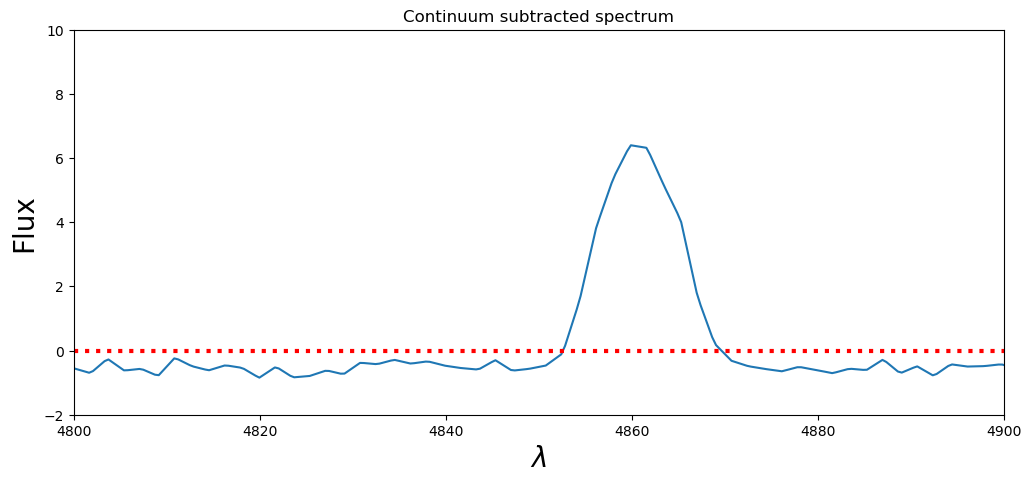

In [32]:
from specutils.fitting import fit_lines

#first zoom in on the Hbeta line
f,ax = plt.subplots(figsize=(12,5))  
ax.plot(specm57.wavelength, contsubspec, label='continuum subtracted data')  
ax.set_title("Continuum subtracted spectrum")  
ax.set_xlim(4800,4900)
ax.set_ylim(-2,10)
ax.axhline(0.0,color='red',linestyle=':',linewidth=3,label='zero for reference')
ax.set_xlabel("$\lambda$",fontsize=20)
ax.set_ylabel("Flux",fontsize=20)

turns out that even our best efforts in Problem 2b couldn't get the continuum to be zero.  That's because our continnuum fit was trying to fit all the continuum everywhere, when in reality we only needed it in one part.  So let's fix this by computing the mean of the continuum away from the line and correcting the line.

mean continuum = -0.543


<>:21: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_802731/818510715.py:21: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("$\lambda$",fontsize=20)


Text(0, 0.5, 'Flux')

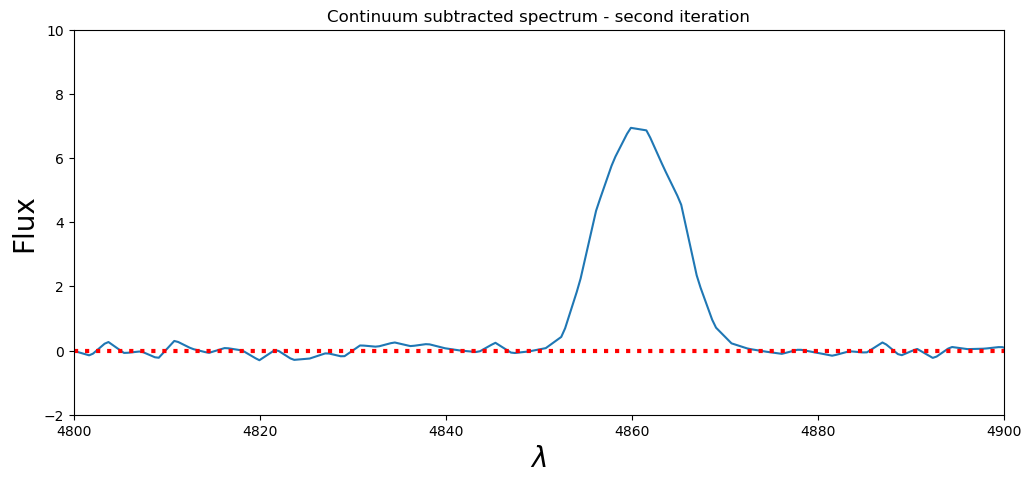

In [33]:
#compute the average of a region away from the line using the zoom in above
#*********************
#your code here
#find the region with a boolean array
contlam = (specm57.wavelength>4800 *u.Angstrom) & (specm57.wavelength<4840 * u.Angstrom)

#now compute the average of the continuum subtracted spectrum in that region and print it out.
meancont = np.mean(contsubspec[contlam])
print('mean continuum = %5.3f' % meancont)

#now correct the continuum subtracted spectrum by that amount
contsubspec -= meancont

#first zoom in on the Hbeta line
f,ax = plt.subplots(figsize=(12,5))  
ax.plot(specm57.wavelength, contsubspec, label='continuum subtracted data')  
ax.set_title("Continuum subtracted spectrum - second iteration")  
ax.set_xlim(4800,4900)
ax.set_ylim(-2,10)
ax.axhline(0.0,color='red',linestyle=':',linewidth=3,label='zero for reference')
ax.set_xlabel("$\lambda$",fontsize=20)
ax.set_ylabel("Flux",fontsize=20)


#### Problem 2c (3 points)
Comment on whether the spectra now has a better continuum subtraction and how you know this.

**your answer here** The spectrum now demonstrates a better continuum subtraction, as evidenced by the flattened baseline in the defined continuum region (4800–4840 Å). After adjusting by the computed mean continuum value, the flux values in this region align closely with the red reference line at zero. This indicates that residual offsets have been effectively removed. Also, the consistency of the baseline across the spectrum, particularly outside the regions dominated by spectral lines, further confirms the improvement. A well-subtracted continuum is crucial for isolating spectral features like the Hβ line, and the current results suggest that the continuum subtraction process has successfully minimized variations and provided a more accurate baseline.


#### Problem 2d (3 points)
Now you will need to fit a gaussian to the spectrum.  We blow up around the line and the run a Gaussian line fitter to estimate the parameters of the Gaussian.  You will then use these to measure the $\Delta \lambda$ and the spectral resolution $R$

<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_802731/1752020344.py:9: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("$\lambda$",fontsize=20)


Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean             stddev     
                           Angstrom          Angstrom    
    ----------------- ----------------- -----------------
    7.165876852853738 4860.776455130805 4.161342065959148
Delta Lambda =  9.80
R = 496.00


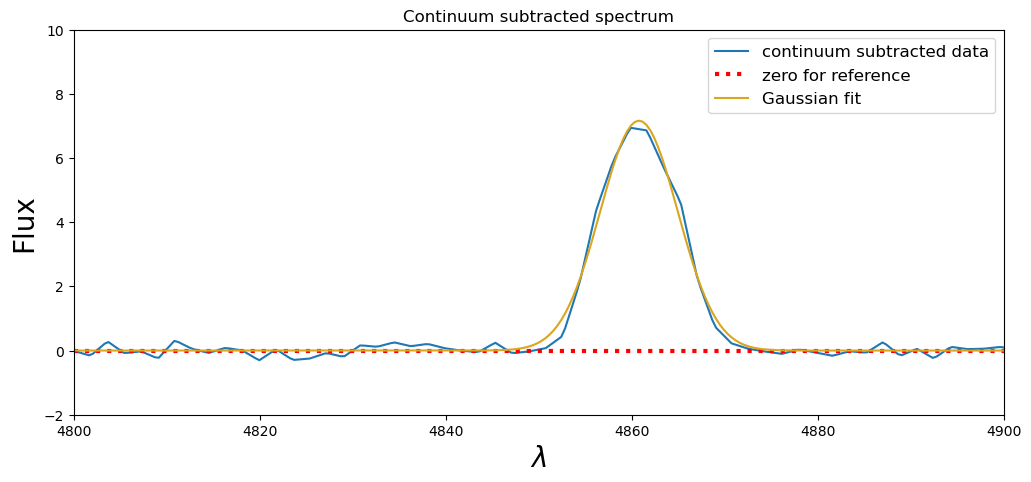

In [34]:
#first zoom in on the Hbeta line
f,ax = plt.subplots(figsize=(12,5))  
ax.plot(specm57.wavelength, contsubspec, label='continuum subtracted data') 

ax.set_title("Continuum subtracted spectrum")  
ax.set_xlim(4800,4900)
ax.set_ylim(-2,10)
ax.axhline(0.0,color='red',linestyle=':',linewidth=3,label='zero for reference')
ax.set_xlabel("$\lambda$",fontsize=20)
ax.set_ylabel("Flux",fontsize=20)

#now fit a gaussian to the spectrum
# Fit the spectrum and calculate the fitted flux values (``y_fit``)
spectrum = Spectrum1D(flux=contsubspec, spectral_axis=specm57.wavelength)

#**********************
#you need to supply the initial guesses for the amplitude, mean, and stddev
#we are assuming thast the flux is unitless because the spectrum isn't calibrated.

g_init = models.Gaussian1D(amplitude = 6 , mean= 4860, stddev= 5) #I corrected the values and now it looks more accurate

#fit the line using the initial guesses
g_fit = fit_lines(spectrum, g_init,get_fit_info=True)
#determine the model flux
y_fit = g_fit(specm57.wavelength)

#plot model flux 
ax.plot(specm57.wavelength,y_fit,color='goldenrod',label='Gaussian fit')
ax.legend(fontsize=12)

#print all the paramters
print(g_fit)

#assign the standard deviation to a variable
params = g_fit.param_sets
amp = params[0][0]
mean = params[1][0]
stddev = params[2][0]

#*********************
#Your code here
#you will need to use the fitted parameters to determine the Delta lambda and the spectral resolution
# (remove for students) I compute this using the relation between a Gaussian sigma and the FWHM

deltalam = 2.355 * stddev # esto es igual al valor en multiplicacion de wpix con el delta mu pix que es igual a la diferencia en el valor de la onda 
print('Delta Lambda = %5.2f' % deltalam)

#calculate the spectral resolution
specres = mean / deltalam
print('R = %6.2f' % specres)


Comment in this cell on how the two methods agree and which one you think is more reliable.  You must be quantitative in this discussion.

**answer here:** 

### Problem 3 (4 points)
Assume that the slit went right through the center of the planetary nebula.  Using what you know about the composition of planetary nebula (not necessarily from this class), describe here from where the broad emission lines and sharp rise in flux at the blue end of the planetary nebula come from.

**answer here**: The broad emission lines in the spectrum of a planetary nebula originate from the ionized gases ejected by the central star during its late evolutionary stages. These gases, composed primarily of hydrogen, helium, oxygen, nitrogen, and carbon, are expanding outward, and the resulting Doppler broadening causes the lines to appear widened. The emission lines are produced through recombination radiation (e.g., hydrogen lines like Hα and Hβ) and forbidden transitions in low-density ionized gases (e.g., [O III] and [N II]). The sharp rise in flux at the blue end of the spectrum is due to the hot central star, which emits strongly in the ultraviolet and blue regions, often exceeding temperatures of 100,000 K. This continuum emission is enhanced by free-bound transitions, where free electrons recombine with ions, and by scattering effects within the nebula, which are more efficient at shorter wavelengths. Together, these features provide a distinct fingerprint of the physical processes and composition of the planetary nebula.

### Problem 4 

In this problem you see a comparison of Jupiter's spectrum to that of a G2V star similar to the sun. You will need to answer the following questions

**a. Measure the temperature of each spectrum from the shape of the spectrum. (4 points)**

**b. Compare the two temperatures.(4 points)**

**c. All the visible light we see from Jupiter is reflected sunlight.  Do your best given your knowledge of how light propogates through different media to describe a possible origin for the relative values of the temperatures.  You can also include a discussion of the relative colors of the spectra.(4 points)**

For each part here I would like a significant amount of discussion.  You will put your answers below the code.


*As an aside, note that the very wide absorption lines longward of 6000$\mathring A$ in Jupiter's spectrum are absorption bands from molecules in Jupiter's atmosphere.  These bands absorb light over a wide wavelength range.*

<>:48: SyntaxWarning: invalid escape sequence '\l'
<>:48: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_802731/3106571055.py:48: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\lambda$", fontsize=20)


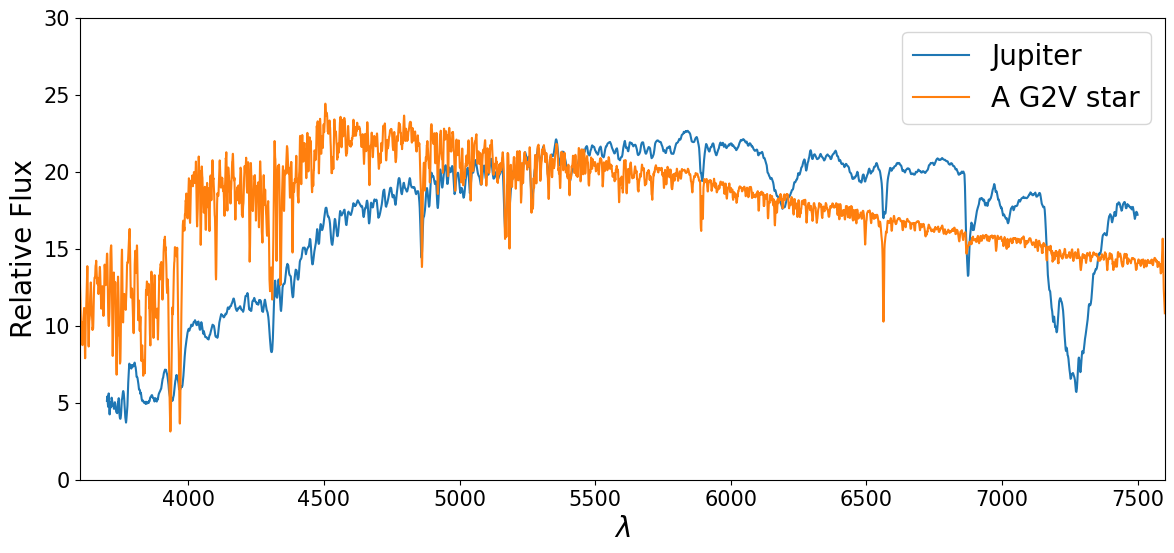

In [44]:
# this is a comparison star from a library similar to that we used in our 
# very first spectral exercise.
starpath = '95128.txt'  # G2V
star1 = Table.read(starpath, format='ascii', names=('lambda', 'flam'))

# plot Jupiter
plt.figure(figsize = (14, 6))
ax = plt.gca()
# Plotting Jupiter's spectrum. 
# The flux is scaled by a factor of 20 to make it visually comparable with the star spectrum. 
# This scaling factor adjusts the vertical scale so both spectra are on a similar level.
plt.plot(specjup.wavelength, specjup.flux * 20, label="Jupiter")

# smooth the comparison stellar spectrum so that the many spectral features
# don't make the comparison difficult.  We use a boxcar filter of size "kernel_size"
# **********
# You should make the initial plot with a smoothing kernel of 1 to see how the unsmoothed 
# very high resolution G2V spectrum looks like.  Then you should change the kernel size to 20 to see 
# how it is easier to use.
# If you'd like you can play more with the kernel size, but it is not required.
kernel_size = 10  # The size of the boxcar filter used for smoothing the star spectrum. 
# A kernel of 1 means no smoothing (sharp features), while a larger kernel size (like 10 or 20) will smooth the spectrum more.
kernel = np.ones(kernel_size) / kernel_size  
# Convolve the star flux with the kernel to apply the smoothing and make the comparison with Jupiter easier.
star1convflam = np.convolve(star1['flam'], kernel, mode='same')
# Plot the smoothed star spectrum. The flux is also scaled by 20 for comparison with Jupiter.
# The lambda axis (wavelength) is used as is, while the flux is smoothed and then scaled.
plt.plot(star1['lambda'], star1convflam * 20, label='A G2V star')

# **************
# you can change these parameters to zoom in and out of certain parts of the spectra.  
# Make a copy of these parameters and change your copy so as to remember what the 
# original values were

# Defining the flux and wavelength ranges for zooming in on specific parts of the spectra.
fluxmin = 0  # Minimum flux for the y-axis. This is the lower limit of the plot for flux values.
fluxmax = 25  # Maximum flux for the y-axis. This defines the upper limit of the plot for flux values.
lammin = 3600  # Minimum wavelength in Angstroms. This sets the starting point of the x-axis (about 3600 Å, in the UV range).
lammax = 7600  # Maximum wavelength in Angstroms. This sets the end point of the x-axis (up to 7600 Å, covering UV to IR range).
# The x and y axis limits are applied to the plot based on these values, controlling the zoom level.
ax.set_ylim([fluxmin, fluxmax])  
ax.set_xlim([lammin, lammax])  

# Adjusting the appearance of the plot for readability.
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.ylim(0, 30) 
plt.xlabel("$\lambda$", fontsize=20)  
plt.ylabel("Relative Flux", fontsize=20) 
plt.legend(fontsize=20) 

**answer to part a here**  Make sure to provide all calculations either in code or in LaTeX.  

In [36]:
#***************
#Any code needed for problem 4b goes here.  Please print your temperatures.  
Jupwavepeak = 5750e-10
Sunwavepeak = 4500e-10
temperaturajup = 2.9e-3 / Jupwavepeak
temperaturasun = 2.9e-3 / Sunwavepeak
diferencia = temperaturasun - temperaturajup 
print(temperaturajup)
print(temperaturasun)
print(diferencia)

5043.478260869565
6444.444444444444
1400.9661835748793


**answer to part b here**  Make sure to provide all calculations either in code or in LaTeX.  

The temperature of the sun is higher than Jupiter by ~1400 K which is very small difference taking in count that Jupiter has temperatures around 200K and also that the light from it is not produced, it is reflected.

**answer to part c here**  Make sure to provide all calculations either in code or in LaTeX.

Since the light we see reflected from Jupiter comes from the planet itself, it means Jupiter's atmosphere likely reflects more red light and absorbs more blue light.

### Problem 5 - Identify features in spectrum of Jupiter (4 points)

In this exercise you will identify various components of the spectrum of Jupiter.  In doing this you can zoom in and out of the plot using the `ax.set_xlim` and `ax.set_ylim()` commands.  

Using what you know about the spectral lines in an A0V star and given the spectrum of Vega plotted below, identify as many of the lines as you can in the spectrum of Jupiter.  By "identify" I mean give the wavelength, the name of the element that makes the line, and which transition of that element causes the specific line.  If you think you should fine a line and can't write why it isn't there.  Please be detailed in your answer. *Note - The line at 6880$\mathring A$ is from the Earth's atmosphere and should be ignored*

**answer here**

Using the spectrum of Vega (A0V star) for reference, the following spectral features can be identified in Jupiter's spectrum:

| **Wavelength (Å)** | **Element** | **Transition**                  |
|---------------------|-------------|---------------------------------|
| 4102   | H (Hydrogen) | Hδ (Balmer series)        |
| *4340        | H (Hydrogen)| Hγ (Balmer series)       |
| 461        |  (Hydrogen) | Hβ (Balmer series)      |
| 6563        | H (Hydrogen)| Hα (Balmer series)       |
| 5890-5896     | Na (Sodium) | Na I doublet (Fraunhofer D-line) |

---


1. Balmer Lines:* These are prominent in Vega (absorption) and weaker in Jupiter. The lines are due to transitions in hydrogen’s Balmer series.
2. Sodium D-line (5890–5896 Å): Jupiter’s atmosphere contains sodium, producing strong absorption features. This line is absent or weak in Vega.
3. Additional Features:
   - Methane (CH₄): Jupiter's spectrum shows broad absorption features due to methane in the near-infrared, impacting parts of the spectrum beyond 6000 Å

- Jupiter’s spectrum is dominated by reflected sunlight (absorption features) and atmospheric absorption bands (e.g., methane).
- Balmer lines are faint due to low hydrogen excitation in Jupiter's cooler atmosphere.


<>:21: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_802731/813815369.py:21: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\lambda [\AA]$",fontsize=20)


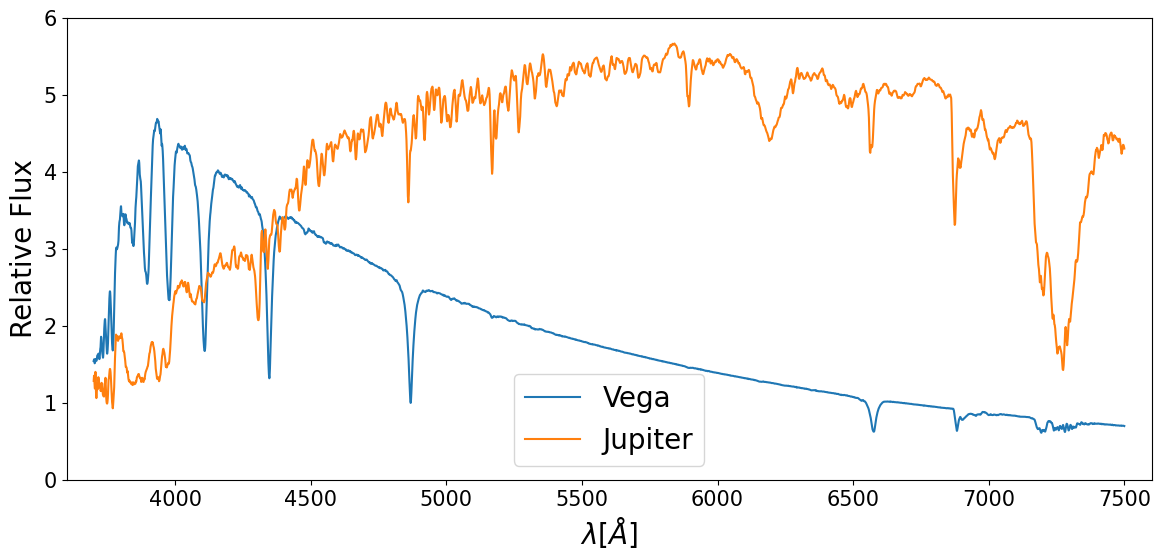

In [37]:
#plot Vega and Jupiter, where I have scaled the flux of Jupiter so that they 
#better overlap. You can change that scaling
plt.figure(figsize = (14,6))
ax = plt.gca()
plt.plot(specvega.wavelength,specvega.flux,label="Vega")
plt.plot(specjup.wavelength,specjup.flux*5,label="Jupiter")

#**************
#you can change these parameters to zoom in and out of certain parts of the spectra.  
#Make a copy of these parameters and change your copy so as to remember what the 
#original values were
fluxmin = 0
fluxmax = 6
lammin = 3600
lammax = 7600
ax.set_ylim([fluxmin,fluxmax])
ax.set_xlim([lammin,lammax])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$\lambda [\AA]$",fontsize=20)
plt.ylabel("Relative Flux",fontsize=20)
plt.legend(fontsize=20)


### Problem 6 - Discuss the physical conditions that drive line formation

In this exercise you will identify various components of the spectrum of Jupiter.  In doing this you can zoom in and out of the plot using the `ax.set_xlim` and `ax.set_ylim()` commands.  

<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_802731/4190528208.py:19: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\lambda [\AA]$",fontsize=20)


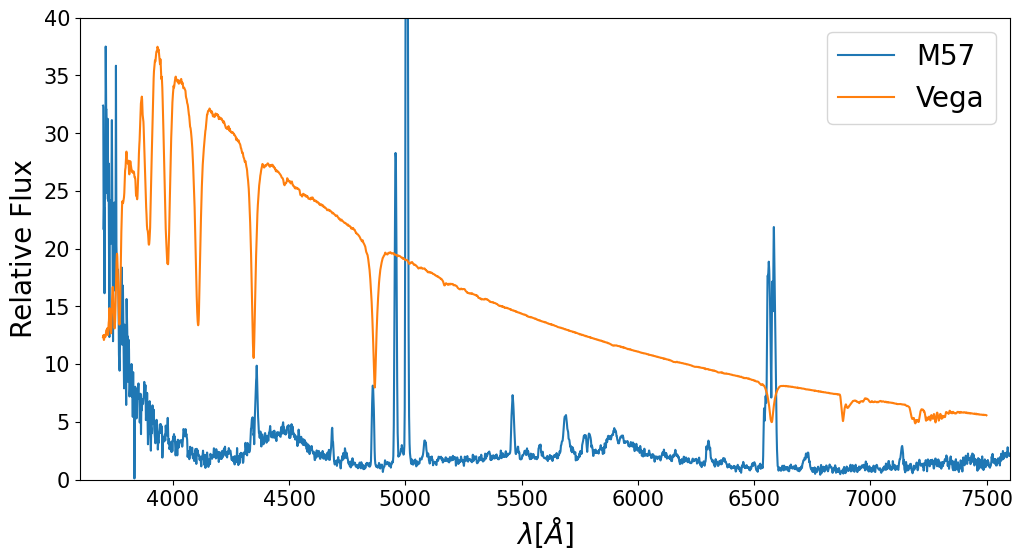

In [38]:
#plot Vega and M57, where I have scaled the flux of Jupiter so that they 
#better overlap. You can change that scaling
plt.figure(figsize = (12,6))
ax = plt.gca()
plt.plot(specm57.wavelength,specm57.flux,label="M57")
plt.plot(specvega.wavelength,specvega.flux*8,label="Vega")

#**************
#you can change these to zoom in and out of certain parts of the spectra.  
fluxmin = 0
fluxmax = 40
lammin = 3600
lammax = 7600
ax.set_ylim([fluxmin,fluxmax])
ax.set_xlim([lammin,lammax])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$\lambda [\AA]$",fontsize=20)
plt.ylabel("Relative Flux",fontsize=20)
plt.legend(fontsize=20)

There are lines in common between M57 and Vega but they are in absorption in Vega and in Emission in M57. Note that the lines do not perfectly line up in wavelength as the M57 spectrum has not been perfectly wavelength calibrated.  

**(6a) Identify the lines in common. (4 points)**

answer here 

The common lines are hydrogen Balmer lines:

| **Wavelength (Å)** | **Line** |
|---------------------|----------|
| **6563**           | **Hα**   |
| **4861**           | **Hβ**   |
| **4340**           | **Hγ**   |
| **4102**           | **Hδ**   |

---

**(6b) Explain why they are in emission in one spectrum and in absorption in the other.  Use your knowledge of Kirkhoffs laws. (4 points)**

*Note - The line at 6880$\mathring A$ is from the Earth's atmosphere and should be ignored.*

answer here

- **Vega (Absorption):** Cooler gas absorbs light from the star's continuous spectrum.  
- **M57 (Emission):** Ionized hydrogen emits light as electrons recombine and cascade to lower energy levels.
